In [129]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('Charades_v1_train.csv')
print(df.shape)
df = df[pd.notnull(df['actions'])]
print(df.shape)
df['origin_index'] = df.index.values
df = df.reset_index(drop=True)

(7985, 11)
(7811, 11)


In [34]:
df.head()

,id,subject,scene,quality,relevance,verified,script,objects,descriptions,actions,length,origin_index
0,46GP8,HR43,Kitchen,6.0,7.0,Yes,A person cooking on a stove while watching som...,food;stove;window,A person cooks food on a stove before looking ...,c092 11.90 21.20;c147 0.00 12.60,24.83,0
1,N11GT,0KZ7,Stairs,6.0,7.0,Yes,"One person opens up a folded blanket, then sne...",blanket;broom;floor,Person at the bottom of the staircase shakes a...,c098 8.60 14.20;c075 0.00 11.70;c127 0.00 15.2...,18.33,1
2,KRF68,YA10,Laundry room,6.0,7.0,Yes,A person runs into their laundry room. They gr...,clothes;door;phone,A person runs in and shuts door. The person gr...,c018 22.60 27.80;c141 4.10 9.60;c148 10.30 25....,30.33,3
3,MJO7C,6RE8,Kitchen,6.0,6.0,Yes,A person runs into their pantry holding a bott...,cup;phone,A person runs in place while holding a bottle ...,c015 0.00 32.00;c107 0.00 32.00,31.38,4
4,S6MPZ,EA2K,Home Office / Study (A room in a house used fo...,6.0,6.0,Yes,A person is eating at the desk and lying the p...,chair;desk;food;phone;plate;snacks;table,A person in a blue shirt is eating snacks off ...,c009 0.00 4.30;c011 0.00 39.00;c015 0.00 39.00...,38.46,5


In [35]:
obj = 'cup/glass/bottle'
classes = ['c106', 'c107', 'c108', 'c109', 'c110', 'c111']

In [123]:

result = []
for i in range(0, len(df)):
    arr = []
    myid = df['id'][i]
    l = df['length'][i]
    arr.append(myid)
    arr.append(math.ceil(float(l)))
    acts = df['actions'][i].split(';')
    arr.append(acts)
    result.append(arr)


In [124]:
result

[['46GP8', 25, ['c092 11.90 21.20', 'c147 0.00 12.60']],
 ['N11GT',
  19,
  ['c098 8.60 14.20',
   'c075 0.00 11.70',
   'c127 0.00 15.20',
   'c153 6.40 12.10']],
 ['KRF68',
  31,
  ['c018 22.60 27.80',
   'c141 4.10 9.60',
   'c148 10.30 25.00',
   'c006 4.20 10.90',
   'c002 6.80 14.10',
   'c150 0.00 9.90',
   'c000 6.20 15.30']],
 ['MJO7C', 32, ['c015 0.00 32.00', 'c107 0.00 32.00']],
 ['S6MPZ',
  39,
  ['c009 0.00 4.30',
   'c011 0.00 39.00',
   'c015 0.00 39.00',
   'c019 0.00 39.00',
   'c156 0.00 30.70',
   'c059 0.00 39.00',
   'c061 0.00 8.00',
   'c061 5.00 11.50',
   'c017 0.00 35.50',
   'c063 0.00 3.70']],
 ['7HVU8',
  30,
  ['c020 0.00 5.60',
   'c004 12.40 31.00',
   'c001 0.00 10.00',
   'c144 13.50 18.90',
   'c127 0.00 5.00',
   'c127 1.60 7.80',
   'c127 6.30 12.30']],
 ['MCQO5',
  32,
  ['c148 4.20 13.40',
   'c106 29.60 33.00',
   'c000 2.10 23.50',
   'c107 21.40 33.00',
   'c002 1.50 6.30',
   'c110 20.60 25.90']],
 ['VPIYF', 11, ['c015 1.80 11.00']],
 ['JSUF4'

In [125]:
tmp = []
for i in range(0, len(result)):
    arr = result[i][2]
    flag = 0
    for a in arr:
        for cla in classes:
            if cla in a:
                flag = 1
                break
        if flag == 1:
            tmp.append(result[i])
            break

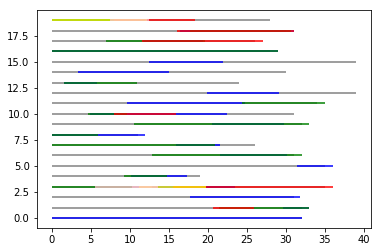

In [224]:

howlong = 20 #len(tmp)
for i in range(0, howlong):
    myid = tmp[i][0]
    leng = tmp[i][1]
    cls = tmp[i][2]
    c = ['total', 'obj']
    st = []
    et = []
    st.append(0.0)
    et.append(leng)
    t = 0
    for j in range(0, len(cls)):
        c = cls[j]
        spl = c.split(' ')
#         print(spl)
        name = spl[0]
        if name not in classes:
            continue
        sTime = float(spl[1])
        eTime = float(spl[2])
        st.append(sTime)
        et.append(eTime)
        t = t + 1
#         print(spl)
        
    color_mapper = np.vectorize(lambda x: {0: 'grey', 1: 'blue', 2: 'green', 3: 'red', 4: 'yellow', 5: 'pink', 6: 'orange', 7: 'purple'}.get(x))
    
    c = np.arange(0, t + 1, 1)

#     ind = np.array([1])
#     for k in range(0, t - 1):
#         ind = np.append(ind, 2)
#   全部疊在一行
    ind = np.full((t + 1 , 1), i)
#   分成不同行
#     ind = np.arange(0, t + 1, 1)

    plt.hlines(ind, st, et, color_mapper(c))

plt.show()

In [222]:
len(tmp)

1600

In [ ]:
1